# <center> <div style="width: 370px;"> ![Bell_man_Ford](pictures/Bellman_Ford.png)

# <center> Bellman Ford

### Simple Shortest Paths

- If graph contains cycles and negative weights, might contain negative-weight cycles :(
- If graph does not contain negative-weight cycles, shortest paths are simple!
- **Claim:** If $δ(s, v)$ is finite, there exists a shortest path to `v` that is ***simple***
- **Proof:** By contradiction:
     - Suppose no simple shortest path; let π be a shortest path with fewest vertices
     - π not simple, so exists cycle `C` in `π`; `C` has non-negative weight (or else $δ(s, v) = −∞$)
     -Removing C from π forms path `π'` with fewer vertices and weight $w(π') ≤ w(π)$
- Since simple paths cannot repeat vertices, finite shortest paths contain at most $|V | − 1$ edges 

### Negative Cycle Witness

Negative Cycle Witness

- **k-Edge Distance δk(s, v):** This represents the minimum weight of any path from vertex `s` to vertex `v` using at $≤k$ edges.
  
- **Idea:** Our approach revolves around computing $δ_{|V |−1}(s, v)$ and $δ_{|V |}(s, v)$ for all $v ∈ V$.
  
  - If $δ(s, v) = −∞$, then $δ(s, v) = δ_{|V |−1}(s, v)$ since a shortest path must be simple (or may not exist).
  
  - If $δ_{|V |}(s, v) < δ_{|V |−1}(s, v)$, the implication is that there exists a shorter non-simple path to vertex v. Thus, we set $δ_{|V |}(s, v) = −∞$, and we label `v` as a witness to a negative cycle.
  
  - However, it's worth noting that there might be vertices with a shortest-path weight of −∞ that are not considered witnesses.
  
- **Claim:** If $δ(s, v) = −∞$, then vertex `v` is reachable from a witness.
  
  - **Proof:** To prove this claim, we must demonstrate that every negative-weight cycle reachable from s contains at least one witness.
  
    - Consider a negative-weight cycle `C` that is reachable from `s`.
    - For $v∈C$, let $v'∈C$ denote $v$'s predecessor in C, where $\sum_{v∈C} w(v', v)<0$
    - Then $δ_{|V|} (s,v)≤δ_{|V|-1} (s,v')+w(v',v)$ (RHS weight of some path on $≤ |V |$ vertices) 
    - So 
    $$ \sum_{v∈C} (δ_|V| (s,v) ≤ \sum_{v∈C} δ_{|V|-1} (s,v') + \sum_{v∈C} w(v',v) < \sum_{v∈C} δ_{|V|-1} (s,v) $$
    - If C contains no witness, $δ_{|V |}(s, v) ≥ δ_{|V |−1}(s, v)$ for all v ∈ C, a contradiction

If C contains no witness, δ|V |(s, v) ≥ δ|V |−1(s, v) for all v ∈ C, a contradiction

## Bellman Ford

In our lecture, we introduced a version of the Bellman-Ford algorithm that utilizes graph duplication and DAG Relaxation techniques to efficiently solve Single-Source Shortest Path (SSSP) problems in O(|V ||E|) time and space complexity. This version of the algorithm also has the unique capability to identify negative-weight cycles reachable on a path from the source vertex 's' to any other vertex 'v' with a shortest-path distance of δ(s, v) = −∞.

In contrast, the original Bellman-Ford algorithm is simpler in its approach and uses only O(|V |) space. However, its primary function is to detect the presence of negative-weight cycles rather than providing detailed information about them. The original algorithm follows a straightforward procedure: it initializes distance estimates, relaxes all edges in the graph over |V |−1 rounds, and checks for negative-weight cycles during this process.

Below is a Python implementation of the Bellman-Ford algorithm for reference:

```algorithm
function BellmanFord(Adj, w, s):
    // Step 1: Initialization
    d[s] = 0  // Distance from source to itself is 0
    parent[s] = None  // Source has no parent
    
    for each vertex v in Adj:
        if v ≠ s:
            d[v] = ∞  // Initialize all other distances to infinity
            parent[v] = None
    
    // Step 2: Relaxation Rounds
    for k from 1 to |V| - 1:
        for each vertex u in Adj:
            for each edge (u, v) in Adj[u]:
                if d[u] + w(u, v) < d[v]:
                    d[v] = d[u] + w(u, v)  // Relax the edge (u, v)
                    parent[v] = u  // Update parent pointer
    
    // Step 3: Negative Weight Cycle Detection
    for each vertex u in Adj:
        for each edge (u, v) in Adj[u]:
            if d[u] + w(u, v) < d[v]:
                raise Exception('Ack! There is a negative weight cycle!')
    
    // Step
```

This algorithm shares a similar structure with the general relaxation paradigm but imposes restrictions on the order in which edges are processed. It relaxes every edge of the graph (lines 10-12) over a series of |V | − 1 rounds (line 9). A lemma is provided to establish the algorithm's correctness.

The lemma states that at the end of relaxation round i in the Bellman-Ford algorithm, d(s, v) equals δ(s, v) for any vertex v that has a shortest path from s, traversing at most i edges. The proof of this lemma is provided through induction.

If the graph does not contain negative-weight cycles, a shortest path is simple and contains at most |V |−1 edges, as it traverses each vertex of the graph at most once. Therefore, after |V |−1 rounds of Bellman-Ford, d(s, v) = δ(s, v) for every vertex with a simple shortest path from s to v. However, if, after |V | − 1 rounds of relaxation, some edge (u, v) still violates the triangle inequality (lines 14-17), then there exists a path from s to v using |V | edges with lower weight than all paths using fewer edges, indicating the presence of a negative weight cycle.

This algorithm runs for |V | rounds, with each round involving a constant amount of work for each edge in the graph, resulting in a time complexity of O(|V ||E|).

It's important to note that while this algorithm shares similarities with the lecture version, there are key differences, including the tracking of multiple layers of distance estimates and variations in relaxation behavior. The original Bellman-Ford may converge to a solution more quickly in some cases due to its relaxation approach.

and in **Python:**

In [1]:
def bellman_ford(Adj, w, s):
    """
    Bellman-Ford Algorithm for Single-Source Shortest Paths.
    
    Parameters:
    - Adj: Adjacency list representing the graph.
    - w: Function to get the weight of an edge (u, v).
    - s: The source vertex.
    
    Returns:
    - d: Shortest path estimates from the source to all vertices.
    - parent: Parent pointers for constructing shortest paths.
    """
    
    # Step 1: Initialization
    infinity = float('inf')  # A number greater than the sum of all positive weights
    num_vertices = len(Adj)
    d = [infinity for _ in range(num_vertices)]  # Shortest path estimates d(s, v)
    parent = [None for _ in range(num_vertices)]  # Initialize parent pointers
    d[s] = 0  # Initialize the source vertex's distance as 0

    # Step 2: Relaxation Rounds
    for _ in range(num_vertices - 1):
        for u in range(num_vertices):
            for v, weight in Adj[u]:
                if d[u] + weight < d[v]:
                    d[v] = d[u] + weight
                    parent[v] = u

    # Step 3: Negative Weight Cycle Detection
    for u in range(num_vertices):
        for v, weight in Adj[u]:
            if d[u] + weight < d[v]:
                raise Exception('Ack! There is a negative weight cycle!')

    # Step 4: Output
    return d, parent


### In summary

- ***Idea!*** Use graph duplication: make multiple copies (or levels) of the graph
- `|V | + 1` levels: vertex $v_k$ in level `k` represents reaching vertex `v` from s using `≤ k` edges
- If edges only increase in level, resulting graph is a ***DAG***!

---

- Construct new DAG G' = (V', E') from G = (V, E):
     - G' has `|V|(|V| + 1)` vertices $v_k$ for all `v ∈ V` and `k ∈ {0, . . . , |V|}`
     - G' has `|V|(|V| + |E|)` edges:
         - `|V|` edges `(vk−1, vk)` for `k ∈ {1, . . . , |V|}` of weight zero for each v ∈ V
         - `|V|` edges `(uk−1, vk)` for `k ∈ {1, . . . , |V|}` of weight w(u, v) for each (u, v) ∈ E
- Run DAG Relaxation on G0 from `s'` to compute $δ(s_0, v_k)$ for all $v_k ∈ V'$
- For each vertex: set $d(s, v) = δ(s_0, v_{|V |−1})$
- For each witness $u ∈ V$ where $δ(s_0, u_{|V |}) < δ(s_0, u_{|V |−1})$:
     - For each vertex v reachable from u in G:
         - set $d(s, v) = −∞$

---

## Example

# <center> <div style="width: 370px;"> 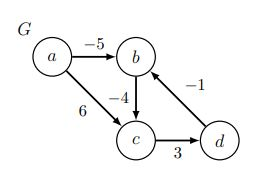

# <center> <div style="width: 370px;"> 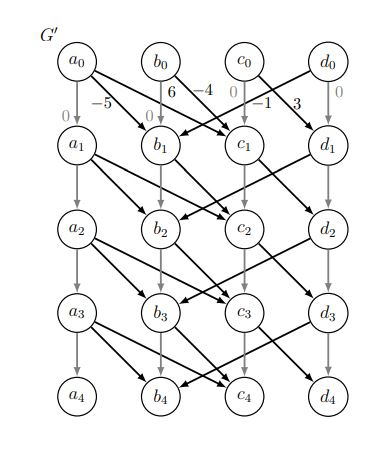

$$δ(a_0, v_k)$$

| k \ v |  a  |  b  |  c  |  d  |
|-------|----|----|----|----|
|   0   |  0 | ∞  | ∞  | ∞  |
|   1   |  0 | -5 |  6 | ∞  |
|   2   |  0 | -5 | -9 |  9 |
|   3   |  0 | -5 | -9 | -6 |
|   4   |  0 | -7 | -9 | -6 |
| δ(a, v)|  0 | ∞  | ∞  | ∞  |


## Correctness

**Claim**: δ(s₀, vₖ) = δₖ(s, v) for all v ∈ V and k ∈ {0, . . . , |V|}

**Proof**: By induction on k:
  
- **Base case**: True for all v ∈ V when k = 0 (only v₀ reachable from s₀ is v = s).
  
- **Inductive Step**: Assume true for all k < k₀, prove for k = k₀

  δ(s₀, vₖ') = min{δ(s₀, uₖ'₋₁) + w(uₖ'₋₁, vₖ') | uₖ'₋₁ ∈ Adj⁻(vₖ')}

  = min{{δ(s₀, uₖ'₋₁) + w(u, v) | u ∈ Adj⁻(v)} ∪ {δ(s₀, vₖ'₋₁)}}

  = min{{δₖ'₋₁(s, u) + w(u, v) | u ∈ Adj⁻(v)} ∪ {δₖ'₋₁(s, v)}} (by induction)

  = δₖ'(s, v)

---

**Claim**: At the end of Bellman-Ford, d(s, v) = δ(s, v)


**Proof**: Correctly computes $δ_{|V|-1}(s, v)$ and $δ_{|V|}(s, v)$ for all $v ∈ V$ by previus Claim

- If $δ(s, v) = -∞$, correctly sets $d(s, v) = δ_{|V|-1}(s, v) = δ(s, v)$
- Then sets $d(s, v) = -∞$ for any `v` reachable from a witness; correct by Claim in befor

### Running Time

- G' has size $O(|V |(|V | + |E|))$ and can be constructed in as much time
- Running DAG Relaxation on G' takes linear time in the size of G'
- Does `O(1)` work for each vertex reachable from a witness
- Finding reachability of a witness takes `O(|E|)` time, with at most `O(|V |)` witnesses: `O(|V ||E|)`
- (Alternatively, connect super node `x` to witnesses via ***0-weight edges***, linear search from x)
- Pruning G at start to only subgraph reachable from s yields `O(|V ||E|)-time` algorithm